# Análise exploratória

In [ ]:
import pandas as pd
dados = pd.read_csv('tips.csv')


dados.head(19)
dados.columns = ['vl_preco_total', 'vl_gorjeta', 'fl_sobremesa', 'ds_dia_semana','ds_hora_dia', 'ds_total_pessoas']

sim_nao = {'No': 'Não', 'Yes':'Sim'}
dados.fl_sobremesa.map(sim_nao)
dados.fl_sobremesa = dados.fl_sobremesa.map(sim_nao) 


dados.ds_dia_semana = dados.ds_dia_semana.map({'Sun': 'Dom', 'Sat': 'Sab' , 'Thur': 'Ter', 'Fri':'Sex'})
dados.ds_hora_dia = dados.ds_hora_dia.map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})

In [ ]:
!pip install seaborn==0.9 # devemos instalar o SEABORN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires seaborn>=0.10.1, but you have seaborn 0.9.0 which is incompatible.


In [ ]:
!pip show seaborn # comando para ver a versão do seu seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.9/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno, pandas-profiling


,vl_preco_total,vl_gorjeta,fl_sobremesa,ds_dia_semana,ds_hora_dia,ds_total_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sab,Jantar,3,0.20
240,27.18,2.00,Sim,Sab,Jantar,2,0.07
241,22.67,2.00,Sim,Sab,Jantar,2,0.09
242,17.82,1.75,Não,Sab,Jantar,2,0.10


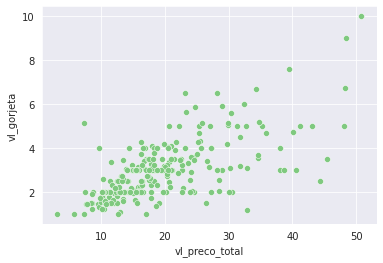

In [ ]:
import seaborn as sn
dados.columns 

valor_gorjeta = sn.scatterplot(x='vl_preco_total',y='vl_gorjeta',data=dados)
dados.count()

dados['porcentagem'] = dados['vl_gorjeta'] / dados['vl_preco_total']
dados.porcentagem = dados.porcentagem.round(2)
dados

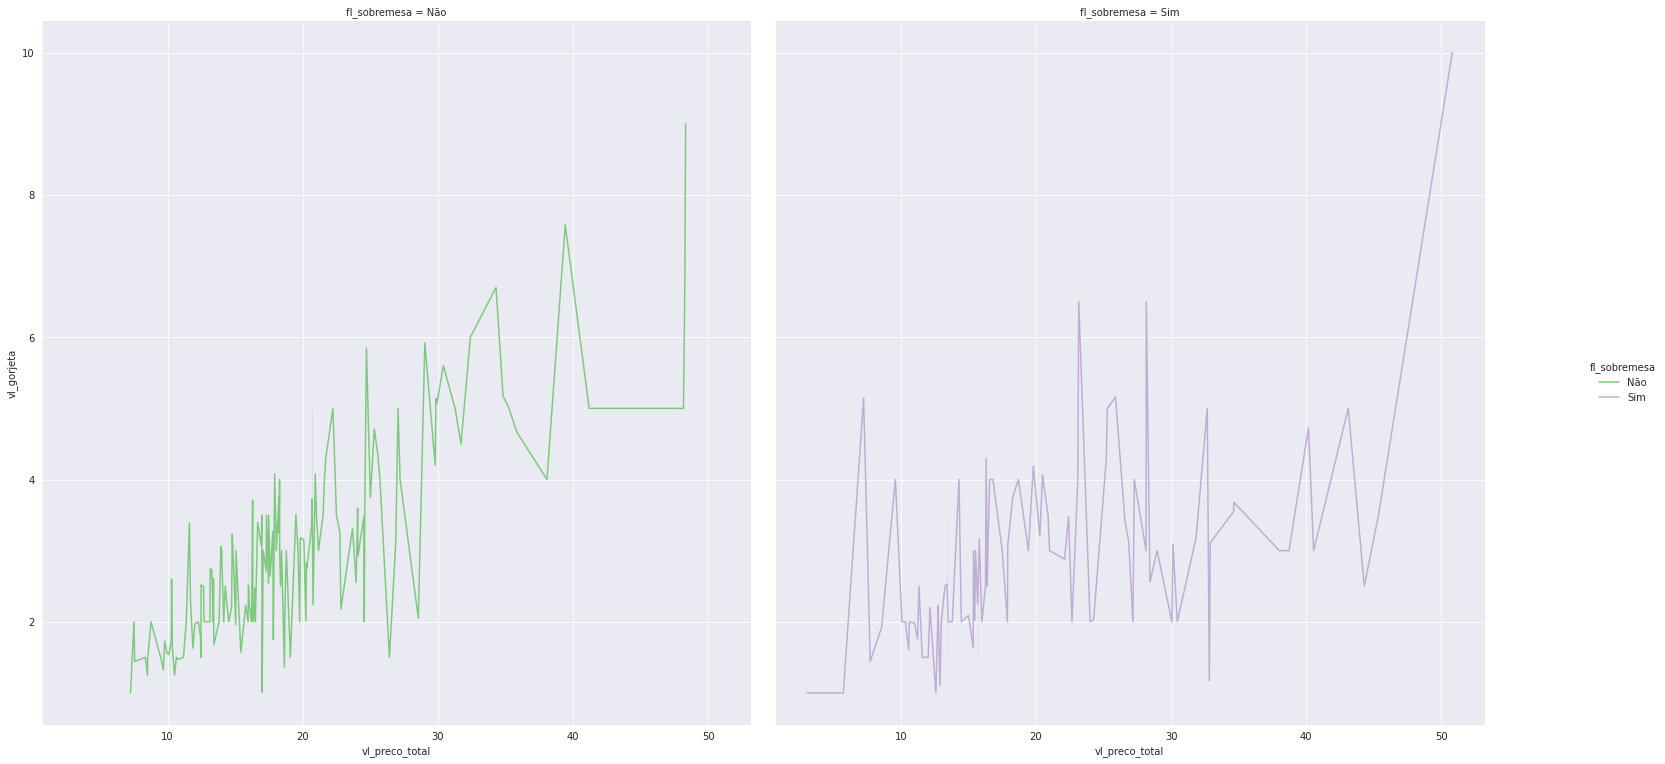

In [ ]:
import seaborn as sn
from scipy.stats import ranksums

sobremesa = dados.query('fl_sobremesa == "Sim"').porcentagem
sobremesa_n = dados.query('fl_sobremesa == "Não"').porcentagem

r = ranksums(sobremesa, sobremesa_n)
r.pvalue
# A distruibuição de valor da gorjeta é relativamente igual nos dois casos de horário de dia
x = sn.relplot(x='vl_preco_total',y='vl_gorjeta', hue='fl_sobremesa',col='fl_sobremesa', kind='line',data=dados)
x.figure.set_size_inches(24,12)

# Começando aos estudos de Time Series

Text(0, 0.5, 'Vendas (R$)')

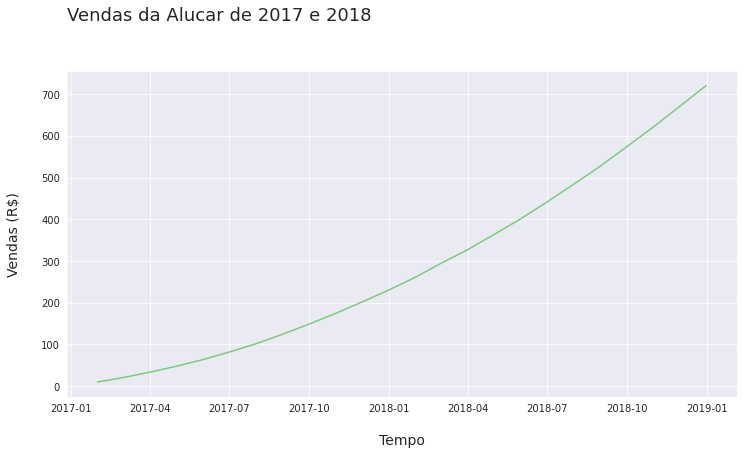

In [ ]:
import pandas as pd
import seaborn as sn
%matplotlib inline 
import matplotlib.pyplot as plt


alucar = pd.read_csv('alucar.csv')
alucar.columns.name = 'Id'
alucar.isna().sum().sum() 
alucar['mes'] = pd.to_datetime(alucar.mes) 


sn.set_palette('Accent') # setando estilos dentro do meu gráfico
sn.set_style('darkgrid') 
x = sn.lineplot(x='mes',y='vendas',data=alucar)

x.figure.set_size_inches(12, 6) 

x.set_title('Vendas da Alucar de 2017 e 2018', loc='left',fontsize=18,pad=50)
x.set_xlabel('Tempo', fontsize=14,labelpad=20)
x.set_ylabel('Vendas (R$)',fontsize=14, labelpad=20)


Text(0, 0.5, 'Aumento')

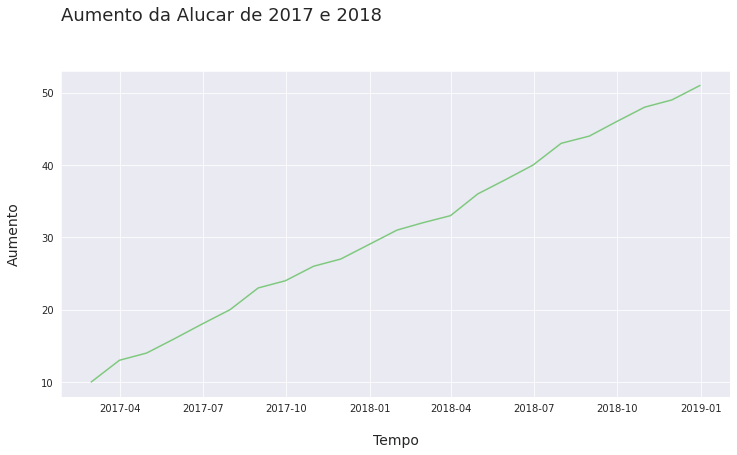

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()

sn.set_palette('Accent') 
sn.set_style('darkgrid') 
x = sn.lineplot(x='mes',y='aumento',data=alucar)
x.figure.set_size_inches(12, 6) 
x.set_title('Aumento da Alucar de 2017 e 2018', loc='left',fontsize=18,pad=50)
x.set_xlabel('Tempo', fontsize=14,labelpad=20)
x.set_ylabel('Aumento',fontsize=14, labelpad=20)


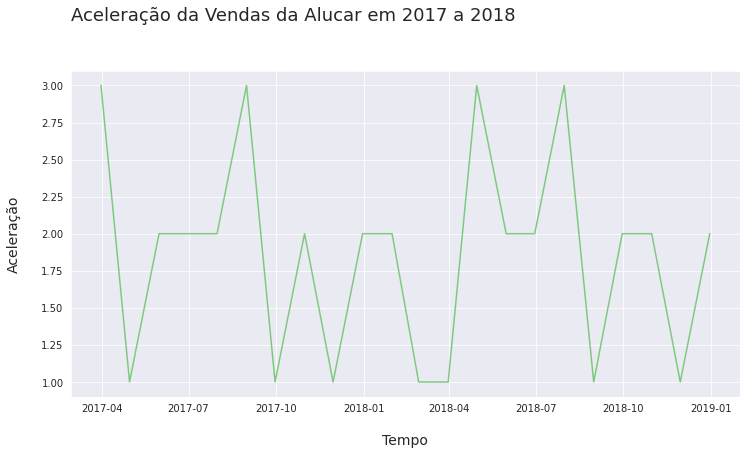

In [ ]:
def plotar_grafic_line(titulo, labelx,labely,x,y,dataset): # criando uma função para criar um gráfico de LINE de maneira mais fácil.
  sn.set_palette('Accent') 
  sn.set_style('darkgrid') 
  x = sn.lineplot(x=x,y=y,data=dataset)
  x.figure.set_size_inches(12, 6)
  x.set_title(titulo, loc='left',fontsize=18,pad=50)
  x.set_xlabel(labelx, fontsize=14,labelpad=20)
  x.set_ylabel(labely,fontsize=14, labelpad=20)


alucar['aceleracao'] = alucar['aumento'].diff() # aceleração de aumento.
plotar_grafic_line("Aceleração da Vendas da Alucar em 2017 a 2018", 'Tempo','Aceleração', 'mes','aceleracao', alucar)

In [ ]:
plt.figure(figsize=(12,6))


def plotando_subplot(titulo_principal, xlabel, y1,y2,y3,dataset):
  ax = plt.subplot(3,1,1) 

  ax.set_title(titulo_principal, fontsize=18,loc='left')
  sn.lineplot(x=xlabel,y=y1,data=dataset)

  plt.subplot(3,1,2)
  sn.lineplot(x=xlabel,y= y2,data=dataset)

  plt.subplot(3,1,3)
  sn.lineplot(x=xlabel,y=y3,data=dataset)
alucar

Id,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


<Figure size 864x432 with 0 Axes>

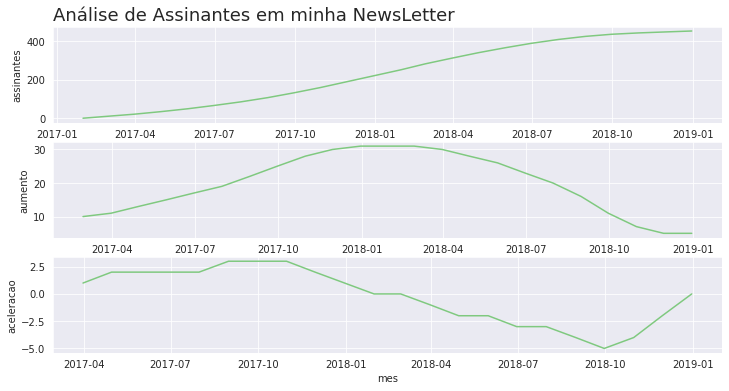

In [ ]:
plt.figure(figsize=(12,6))

ass = pd.read_csv('newsletter_alucar.csv')
ass['mes'] = pd.to_datetime(ass.mes)
ass['assinantes'] = ass.assinantes

ass['aumento'] = ass['assinantes'].diff()
ass['aceleracao'] = ass['aumento'].diff()
ass.columns.name = 'Id'

plotando_subplot("Análise de Assinantes em minha NewsLetter", 'mes', 'assinantes','aumento','aceleracao',ass)

<ipython-input-136-05ac22f1bdfa>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grupo_semana = vendaspdia.groupby('dia_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


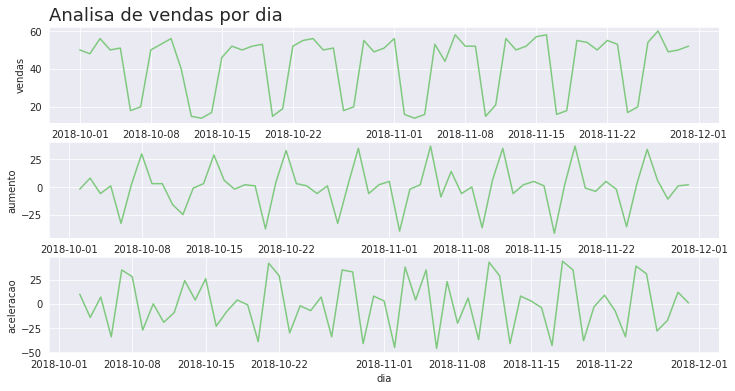

In [ ]:
# chocolura - analisando as vendas
plt.figure(figsize=(12,6))
vendaspdia = pd.read_csv('vendas_por_dia.csv')
vendaspdia.dia = pd.to_datetime(vendaspdia.dia)
vendaspdia['aumento'] = vendaspdia.vendas.diff()
vendaspdia['aceleracao'] = vendaspdia.aumento.diff()

plotando_subplot('Analisa de vendas por dia','dia','vendas','aumento','aceleracao',vendaspdia)
vendaspdia['dia_semana'] = vendaspdia['dia'].dt.day_name() 

dia_sem_port = {
                'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta',
                'Friday':'Sexta', 'Saturday':'Sábado','Sunday':'Domingo'
                }
                
vendaspdia['dia_semana'] = vendaspdia['dia_semana'].map(dia_sem_port)
grupo_semana = vendaspdia.groupby('dia_semana')['vendas','aumento','aceleracao'].mean().round()

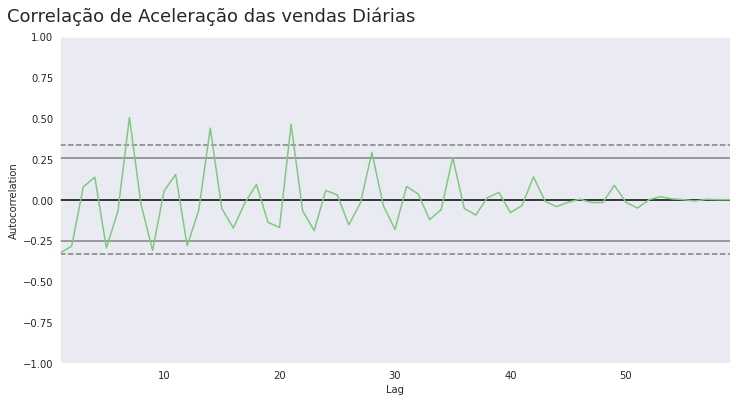

In [ ]:
# correlação das vendas diárias
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Aceleração das vendas Diárias',fontsize=18,x=0.3,y=0.95) 
autocorrelation_plot(vendaspdia['aceleracao'][2:]) 
ax = ax 

Qunaitdade de linhas e colunas 24  e  2
Quantidade de valores dentro de seu dataframe:  0


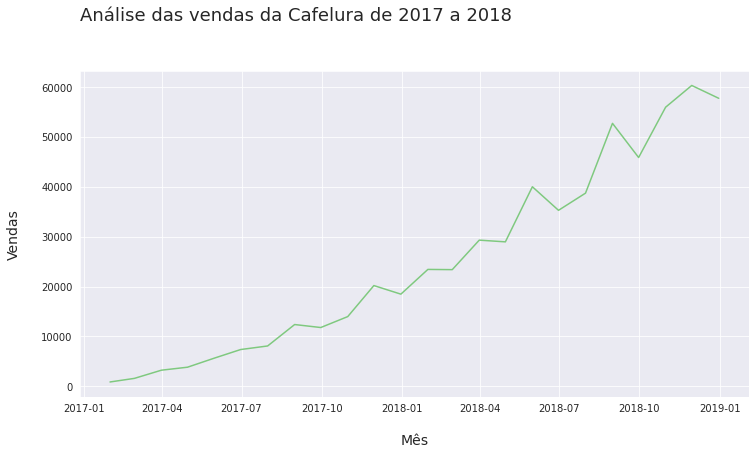

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.mes = pd.to_datetime(cafelura.mes)
cafelura.dtypes
print('Qunaitdade de linhas e colunas',cafelura.shape[0],' e ', cafelura.shape[1])
print('Quantidade de valores dentro de seu dataframe: ', cafelura.isna().sum().sum())
plotar_grafic_line('Análise das vendas da Cafelura de 2017 a 2018','Mês','Vendas','mes','vendas',cafelura)

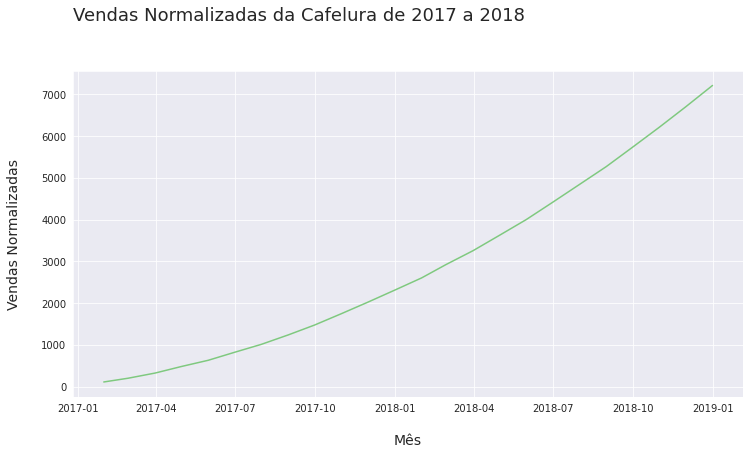

In [ ]:
# Normalizando uma time series 
# dias de finais de semanas que eu tive, normalizando cada mês por seu dia de finais de semana

quantidade_de_dias_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_fds['quantidade_de_dias'].values 

cafelura['vendas_normalizadas'] = cafelura.vendas / quantidade_de_dias_fds['quantidade_de_dias'].values
cafelura.head()

plotar_grafic_line('Vendas Normalizadas da Cafelura de 2017 a 2018','Mês','Vendas Normalizadas','mes','vendas_normalizadas',cafelura)

<AxesSubplot:title={'center':'Vendas Normalizadas Cafelura 2017 a 2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

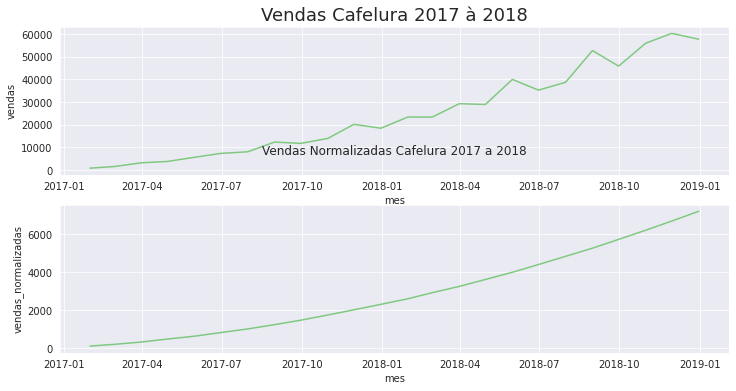

In [ ]:
plt.figure(figsize=(12,6))

ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 à 2018',fontsize=18)
sn.lineplot(x='mes',y='vendas',data=cafelura)

ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 a 2018', pad=50)
sn.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)

# o gráfico representa as vendas, de duas formas, gráficos normalizados (pela quantidade de dias de finais de semana)
